# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

### Theoretical results

1. Solution

$\nabla_x f(x,y) = A(y - b_y) + \lambda (x - b_x)$

$\nabla_y f(x,y) = A^T(x - b_x) - \lambda (y - b_y) = A(x - b_x) - \lambda (y - b_y)$

$\nabla_x f(x^*,y^*) = A(y^* - b_y) + \lambda (x^* - b_x) = 0 \Rightarrow \lambda (x^* - b_x) = -A(y^* - b_y)$

$\nabla_y f(x^*,y^*) = A(x^* - b_x) - \lambda (y^* - b_y) = 0 \Rightarrow -A^2(y^* - b_y) - \lambda (y^* - b_y) = 0 \Rightarrow (A^2 + \lambda I)(y^* - b_y) = 0 \Rightarrow y^* = b_y  \Rightarrow x^* = b_x$

2. Strong convexity by $x$ and strong concavity by $y$

Using the criteria of strong convexity:

$\nabla_x f(x,y) = A(y - b_y) + \lambda (x - b_x)$

$\nabla_x^2 f(x,y) = \lambda I = I \geq \mu_x I \Rightarrow$ strongly convex by $x$ with $\mu_x = 1$

$\nabla_y f(x,y) = A(x - b_x) - \lambda (y - b_y)$

$\nabla_y^2 f(x,y) = -\lambda I = -I \leq -\mu_y I \Rightarrow$ strongly concave by $y$ with $\mu_y = 1$

Overall, $\mu_x = \mu_y = 1$

3. Strong monotonicity and Lipschitz property of operator

$z = \left(\begin{array}{}
              x \\
              y \end{array}\right) ~ 
F(z) =\left(\begin{array}{}
              \nabla_x f(x, y) \\
              -\nabla_y f(x, y) \end{array}\right) =  \left(\begin{array}{}
               A(y - b_y) + \lambda (x - b_x) \\
              -A(x - b_x) + \lambda (y - b_y) \end{array}\right)$

- Strong monotonicity

$\langle F(z_1) - F(z_2), z_1 - z_2 \rangle \geq \mu \| z_1 - z_2 \|^2$

$\langle A(y_1 - y_2) + \lambda (x_1 - x_2), x_1 - x_2 \rangle + \langle - A(x_1 - x_2) + \lambda (y_1 - y_2), y_1 - y_2 \rangle = \lambda \langle x_1 - x_2, x_1 - x_2 \rangle + \lambda \langle y_1 - y_2, y_1 - y_2 \rangle = \lambda \langle z_1 - z_2, z_1 - z_2 \rangle = \lambda \| z_1 - z_2 \|^2 \Rightarrow \mu = \lambda = 1$, yes, the operator is strongly monotonous

- Lipschitz property

$\|F(z_1) - F(z_2)\| \leq L \| z_1 - z_2 \|$

$\langle A(y_1 - y_2) + \lambda (x_1 - x_2), A(y_1 - y_2) + \lambda (x_1 - x_2) \rangle + \langle - A(x_1 - x_2) + \lambda (y_1 - y_2), - A(x_1 - x_2) + \lambda (y_1 - y_2) \rangle = \|A(y_1 - y_2) \|^2 + \lambda^2 \|x_1 - x_2 \|^2 + 2\lambda \langle A(x_1 - x_2), y_1 - y_2 \rangle + \|A(x_1 - x_2) \|^2 + \lambda^2 \|y_1 - y_2 \|^2 - 2\lambda \langle A(x_1 - x_2), y_1 - y_2 \rangle = \lambda^2 \|z_1 - z_2\|^2 + \|A(x_1 - x_2)\|^2 + \|A(y_1 - y_2)\|^2 \leq \lambda^2 \|z_1 - z_2\|^2  + \|A\|^2\|x_1 - x_2\|^2 + \|A\|^2\|y_1 - y_2\|^2 = (\lambda^2 + \|A\|^2)\|z_1 - z_2\|^2 \Rightarrow L = \sqrt{\lambda^2 + \|A\|^2}$, yes, the operator has the Lipschitz property

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [1]:
import my_optimization as opt
import numpy as np

c:\Users\HP\Anaconda\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#optimization problem
args = {}
args['L'], args['mu'], args['d'], args['lambda'] = 1000, 0.01, 100, 1
args['A'] = opt.gen_A(args['d'], args['mu'], args['L'])
args['b_x'], args['b_y'] = np.random.uniform(low=-10, high=10, size=args['d']), np.random.uniform(low=-10, high=10, size=args['d'])
args['mu'] = args['lambda']
args['L'] = np.sqrt(args['lambda']**2 + np.linalg.norm(args['A'])**2)
args['upper_bound'], args['lower_bound']  = 10, -10
x_0, y_0 = np.random.uniform(low=args['lower_bound'], high=args['upper_bound'], size=args['d']), np.random.uniform(low=args['lower_bound'], high=args['upper_bound'], size=args['d'])
z_0 = np.hstack([x_0, y_0])
z_true = np.hstack([args['b_x'], args['b_y']])
r_0 = np.linalg.norm(z_0 - z_true)

In [3]:
def f_quad(x, y, args):
    return (x - args['b_x']).T @ args['A'] @ (y - args['b_y']) \
            + args['lambda']/2 * (np.linalg.norm(x - args['b_x']))**2 \
            - args['lambda']/2 * (np.linalg.norm(y - args['b_y']))**2

def f_quad_grad_x(x, y, args):
    return args['A'] @ (y - args['b_y']) + args['lambda'] * (x - args['b_x'])

def f_quad_grad_y(x, y, args):
    return args['A'] @ (x - args['b_x']) - args['lambda'] * (y - args['b_y'])

###  Projection

$\text{proj}_C \space x := \text{argmin}_c (\|c - x \|) , \text{where} \space c \in C = [-10, 10]^d$

Obviously $\text{proj}_C \space x = x, \text{if} \space x \in [-10, 10]^d$

Then let's see the case where $x_i \notin [-10, 10]$ for $i \in S = \{i_1, ..., i_k\}$

$\|c - x\| = \sqrt{(c_1 - x_1)^2 + ... + (c_i - x_i)^2 + ... + (c_d - x_d)^2}$

The optimal $c: c_j = x_j, j \space \text{for} \space j \neq i, c_j = 10 \space \text{if} \space x_j > 0, c_j = -10 \space \text{if} \space x_j < 0 \space \text{for} \space j = i$

In other words we should round to the nearest bound if the coordinate is out of bound

In [4]:
#projection on C
def proj_C(x, args):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] > args['upper_bound']:
            ans[i] = args['upper_bound']
        elif x[i] < args['lower_bound']:
            ans[i] = args['lower_bound']
        else:
            ans[i] = x[i]
    return ans

### Gradient descent with projection

Constant choice:
- c_arr = [0.01, 0.1, 1, 10, 100] and c = 100 was outstanding
- c_arr = [10, 50, 100, 150, 500] and c = 500 was outstanding
- c_arr = [500, 600, 700, 800, 1000] and c = 1000 was slightly better than others
- c_arr = [1000, 1100, 1200, 1300, 1400] and c = 1400 was slightly better than others, but the variance increased
- c_arr = [1400, 1500, 2000, 2500, 3000] and c = 3000 was better than others, but the variance increased
- c_arr = [3000, 4000, 5000, 10000] and c = 3000 was better than others, but the variance increased
- c_arr = [1e4, 2e4, 3e4, 4e4, 5e4] and c = 5e4 was better than others, the difference is not that sufficient
- c_arr = [1, 10, 100, 500, 2500, 10000, 5e4] Overall to look at all dependencies
- the best c = 500, theoretical c = 1

In [5]:
n_iter = 10000
x, y, labels = [], [], []

In [6]:
def gamma_gd(k, args): #theoretical lr: c = 1
    return (args['c'] * args['mu']) / (args['L']**2) 
c_arr = [1, 10, 100, 500, 2500, 10000, 5e4]

for args['c'] in c_arr:
    gd = opt.VariatonalOptimizer(f_quad, f_quad_grad_x, f_quad_grad_y, x_0, y_0, gamma_gd, args, n_iter = n_iter, 
                                 criterium = 'relative ||z_k - z^*||', y_lim = 1e-5, z_true = z_true, 
                                 projection_activate = True, projection_operator = proj_C)
    points_arr, differences_arr, gradient_calls_arr = gd.descent()
    
    x.append(gradient_calls_arr)
    y.append(differences_arr)
    if args['c'] == 1:
        labels.append(r'var_gd, theoretical $\gamma = \frac{%f * \mu}{L^2}$' % args['c'])
    else:
        labels.append(r'var_gd, $\gamma = \frac{%f * \mu}{L^2}$' % args['c'])

100%|██████████| 10000/10000 [00:03<00:00, 2507.79it/s]


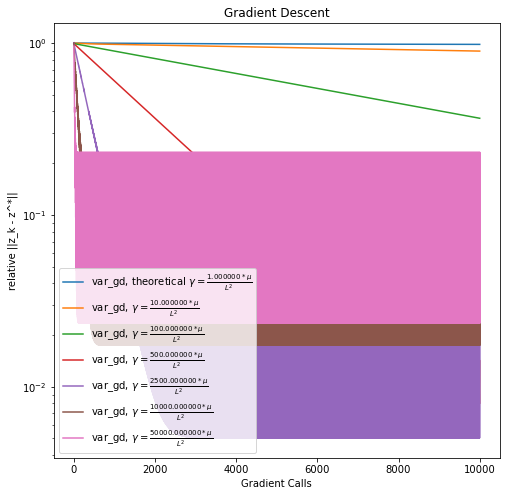

In [7]:
title = 'Gradient Descent'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "relative ||z_k - z^*||")

### Extragradient with projection

Constant choice:
- I used the previous c_arr, added 1e5, 1e6 and it diverges when c = 1e6, and c = 1e5 is optimal
- c_arr = [1, 10, 100, 500, 2500, 10000, 5e4, 1e5] overall 
- the best c = 1e5, theoretical c = 1

In [8]:
def gamma_extragradient(k, args): #theoretical lr: c = 1
    return (args['c']) / (4* args['L']) 
c_arr = [1, 10, 100, 500, 2500, 10000, 5e4, 1e5]

for args['c'] in c_arr:
    extragradient = opt.VariatonalOptimizer(f_quad, f_quad_grad_x, f_quad_grad_y, x_0, y_0, gamma_extragradient, args, n_iter = n_iter, 
                                 criterium = 'relative ||z_k - z^*||', y_lim = 1e-5, z_true = z_true, 
                                 projection_activate = True, projection_operator = proj_C, extragradient_activate=True)
    points_arr, differences_arr, gradient_calls_arr = extragradient.descent()
    
    x.append(gradient_calls_arr)
    y.append(differences_arr)
    if args['c'] == 1:
        labels.append(r'extragradient, theoretical $\gamma = \frac{%f}{4L}$' % args['c'])
    else:
        labels.append(r'extragradient, $\gamma = \frac{%f}{4L}$' % args['c'])

100%|██████████| 10000/10000 [00:07<00:00, 1263.32it/s]


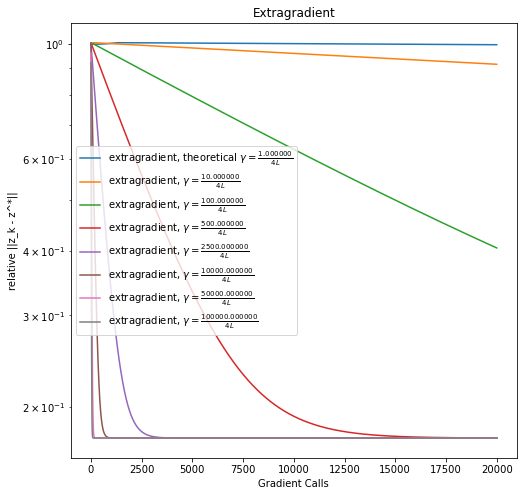

In [9]:
title = 'Extragradient'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "relative ||z_k - z^*||", specific_slice=[7, 8, 9, 10, 11, 12, 13, 14])

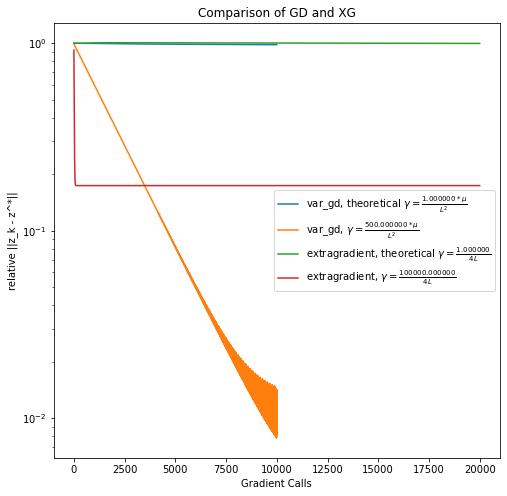

In [10]:
title = 'Comparison of GD and XG'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "relative ||z_k - z^*||", specific_slice=[0, 3, 7, 14])

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

In [146]:
import importlib
importlib.reload(opt)

<module 'my_optimization' from 'c:\\Users\\HP\\Desktop\\МФТИ\\S6\\Optimization S2\\HW\\Kirill-Acharya-MIPT\\my_optimization.py'>

### Some thoughts on the problem

$N = n^2$ - number of houses
$\Delta_d, d = N$ - the probability simplex

The policeman and the burglar choose their vectors $x$ and $y$ of probabilities to be near one of the d houses

The matrix $A \in [0, d - 1]^2$ is that where in $(i, j)$ placed the probability to take the expected profit from $i$-th house by burglar, knowing that policeman is near $j$-th house.

Burglar wants to maximize it, and the policeman wants to minimize it

From the article let the criteria function be: $\text{Err}_{vi}(z) := \max_{u \in Z} \langle F(u), z - u \rangle$

$A_{ij} = w_i(1 - \exp\{-\theta \text{dist}(i, j)\})$

We need to define $w_i$ and I created theoretical solution for symmetric matrix, obviously the distance should be symmetric by definition, so let's make the wealth symmetric too. In the center the maximum wealth (haha, realistic), and it decreases to "suburbs"

The numbers are $\text{nums} = [[0, 1, ..., 9], [10, ..., 19], ... , [90, ..., 99]]$

So, $ \text{dist} (i, j) = \sqrt {((i \% n) - (j \% n))^2 + ((i - i \% n) - (j - j \% n))^2}$

Let's choose $w_i = \frac{1}{|i - 45| + 1}$, implying that $i = 45$ is the wealthiest house

Also, we can use the same `f_quad` and its gradients with `args['b_x'] = args['b_y'] = 0, args['lambda'] = 0, args['L'] = np.linalg.norm(args['A'])`

In [12]:
#Problem setting
args = {}
args['n'] = 10
args['d'] = args['n']**2
args['theta'] = 1
args['b_x'] = args['b_y'] = 0
args['lambda'] = 0

def dist(i, j, args):
    return np.sqrt(((i % args['n']) - (j % args['n']))**2 + ((i - i % args['n']) - (j - j % args['n']))**2)

w_arr = [1/(np.abs(45 - i) + 1) for i in range(args['d'])]

args['A'] = np.zeros((args['d'], args['d']))
for i in range(args['d']):
    for j in range(args['d']):
        args['A'][i][j] = w_arr[i] * (1 - np.exp(- args['theta'] * dist(i, j, args)))

args['L'] = np.linalg.norm(args['A'])
args['mu'] = args['lambda']

x_0, y_0 = np.random.random_sample(args['d']), np.random.random_sample(args['d'])
x_0, y_0 = x_0 / np.linalg.norm(x_0, ord = 1), y_0 / np.linalg.norm(y_0, ord = 1)

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

Algorithm 1. 1. 
Initialization: 

Choose $r_0 \in Z^{\circ}$ and stepsizes $\gamma_{k}> 0$: 

Given $r_{k-1} \in Z^o$
$$
\left\{\begin{array}{l}
w_k=P_{r_{k-1}}\left(\gamma_k {F}\left(r_{k-1}\right)\right), \\
r_k=P_{r_{k-1}}\left(\gamma_k {F}\left(w_k\right)\right)
\end{array}\right.
$$
When $k<t$, loop to step $t+1$.
3. At step t, output
$$
\widehat{z}_t=\left[\sum_{k=1}^t \gamma_k\right]^{-1} \sum_{k=1}^t \gamma_k w_k
$$

And on the simplex $Z=\Delta_d$ we can easily calculate the prox-mapping:
$$
\left(P_z(\xi)\right)_j=\left(\sum_{i=1}^d z_i \exp \left\{-\xi_i\right\}\right)^{-1} z_j \exp \left\{-\xi_j\right\}
$$

As we saw in the previous theoretical block, the criterium used here is:

 $\text{Err}_{vi}(z) := \max_{u \in Z} \langle F(u), z - u \rangle$, where $Z = \Delta_d^2$

 $z = (x_0 \space y_0), F = (Ay \space -Ax), u = (x \space y) \Rightarrow \max_{u \in \Delta_d^2} \langle (Ay \space -Ax), (x_0 - x \space y_0 - y) \rangle = \max_{u \in \Delta_d^2} \langle Ay , x_0 -x \rangle - \langle Ax, y_0 - y \rangle = \max_{x \in \Delta_d, y \in \Delta_d} y^T A x_0 - x^T A y_0$

 From the positivity of all parts we understand that the first part should be maximized, and the second one minimized. As $A x_0$ has a maximum coordinate $(A x_0)_i$, and $y: y_1 + ... + y_d = 1, y_k \geq 0$ we maximize it saying that $y_i = 1$ and other coordinates are zeros. As $A y_0$ has a minimum coordinate $(A y_0)_j$, and $x: x_1 + ... + x_d = 1, x_k \geq 0$ we minimize it saying that $x_j = 1$ and other coordinates are zeros.

Now about the learning rate: the theoretical one from the article is $\gamma=\min \left[\frac{1}{\sqrt{3} L}, \Omega \sqrt{\frac{2}{7 t\left(M^2+2 \sigma^2\right)}}\right]$, but let's choose $\gamma=\frac{c}{\sqrt{3} L}$ and do the fitting with different $c$ as always

In [230]:
n_iter = 10000
x, y, labels = [], [], []

In [124]:
#Modification of extragradient method for this problem: SMP method
#in this case we don't need the projection on simplex, because it is implemented inside of smp

def gamma_smp(k, args): #theoretical lr: c = 1
    return args['c'] / (np.sqrt(3) * args['L']) 
c_arr = [0.1, 1, 100, 125, 150, 200]

smp_solutions = []

for args['c'] in c_arr:
    smp = opt.VariatonalOptimizer(f_quad, f_quad_grad_x, f_quad_grad_y, x_0, y_0, gamma_smp, args, n_iter = n_iter, 
                                 criterium = 'Errvi', y_lim = 1e-5, smp_activate=True)
    points_arr, differences_arr, gradient_calls_arr = smp.descent()
    x.append(gradient_calls_arr)
    y.append(differences_arr)
    smp_solutions.append((points_arr[-1][0:args['d']], points_arr[-1][args['d']:]))
    if args['c'] == 1:
        labels.append(r'smp, theoretical $\gamma = \frac{%f}{\sqrt{3}L}$' % args['c'])
    else:
        labels.append(r'smp, $\gamma = \frac{%f}{\sqrt{3}L}$' % args['c'])

100%|██████████| 10000/10000 [00:18<00:00, 540.76it/s]


### On choosing learning rate

- c_arr = [0.01, 0.1, 1, 10, 100, 1000] firstly traditionally. $c = 100$ was the best, $c = 1000$ wasn't okay
- c_arr = [50, 75, 100, 125, 250, 500, 750] and $c = 125$ got the best result
- c_arr = [0.1, 1, 100, 125, 150, 200] Overall for representative choice

On less iterations the theoretical was worse, but on 10000 iterations it is nearly the best, so let's keep it

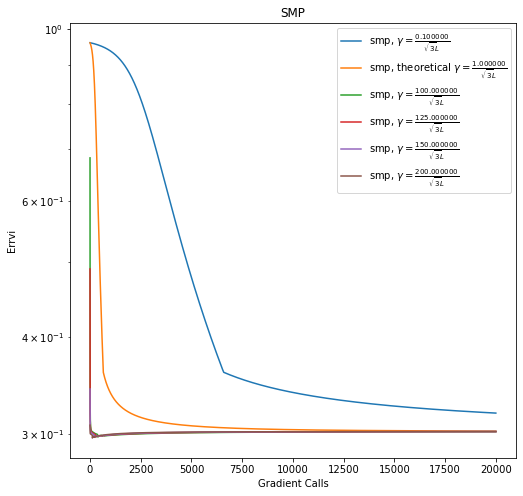

In [101]:
title = 'SMP'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "Errvi")

In [125]:
smp_best_solution = smp_solutions[1]

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

In [47]:
def simplex_proj(x, args):
    x_descending = sorted(x, reverse=True)
    rho = 0
    sum, overall_sum = x_descending[0], x_descending[0]
    for i in range(1, len(x_descending)):
        sum += x_descending[i]

        if x_descending[i] + 1/(i + 1) * (1 - sum) > 0:
            rho = i
            overall_sum = sum
    lmbd = 1 / (rho + 1) * (1 - overall_sum)
    x_proj = np.zeros(len(x_descending))

    for i in range(len(x_proj)):
        x_proj[i] = max(x[i] + lmbd, 0)

    return x_proj

In [210]:
def gamma_gd(k, args): #theoretical lr: c = 1
    return (args['c']) / (args['L']**2) #args['mu'] = 0 so I removed it
c_arr = [1, 5, 10, 50, 100, 150]

for args['c'] in c_arr:
    gd = opt.VariatonalOptimizer(f_quad, f_quad_grad_x, f_quad_grad_y, x_0, y_0, gamma_gd, args, n_iter = n_iter, 
                                 criterium = 'Errvi', y_lim = 1e-5, 
                                 projection_activate = True, projection_operator = simplex_proj)
    points_arr, differences_arr, gradient_calls_arr = gd.descent()
    
    x.append(gradient_calls_arr)
    y.append(differences_arr)
    if args['c'] == 1:
        labels.append(r'var_gd, theoretical $\gamma = \frac{%f}{L^2}$' % args['c'])
    else:
        labels.append(r'var_gd, $\gamma = \frac{%f}{L^2}$' % args['c'])

100%|██████████| 10000/10000 [00:09<00:00, 1069.57it/s]


### On learning rate
- c_arr = [0.01, 0.1, 1, 10, 100, 1000] showed that 1000 is too much, first two are too low
- c_arr = [1, 5, 10, 50, 100, 150] showed that one with c = 10 is okay (actually c = 100, 150 were better in terms of convergence, although I kept c = 10 because it better illustrates oscillations). We see that it has a limit of convergence and then starts oscillating, as proven in theory

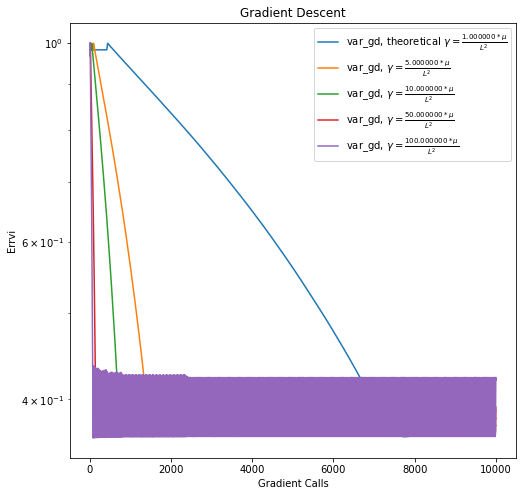

In [216]:
title = 'Gradient Descent'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "Errvi", specific_slice = [0, 1, 2, 3, 4])

In [290]:
x, y, labels = [], [], []
importlib.reload(opt)

<module 'my_optimization' from 'c:\\Users\\HP\\Desktop\\МФТИ\\S6\\Optimization S2\\HW\\Kirill-Acharya-MIPT\\my_optimization.py'>

In [291]:
def gamma_extragradient(k, args): #theoretical lr: c = 1
    return (args['c']) / (4* args['L']) 
c_arr = [0.25, 0.5, 1, 5, 10]

for args['c'] in c_arr:
    extragradient = opt.VariatonalOptimizer(f_quad, f_quad_grad_x, f_quad_grad_y, x_0, y_0, gamma_extragradient, args, n_iter = 1000, 
                                 criterium = 'Errvi', y_lim = 1e-5, projection_activate = True, projection_operator = simplex_proj, 
                                 extragradient_activate=True)
    points_arr, differences_arr, gradient_calls_arr = extragradient.descent()
    
    x.append(gradient_calls_arr)
    y.append(differences_arr)
    if args['c'] == 1:
        labels.append(r'extragradient, theoretical $\gamma = \frac{%f}{4L}$' % args['c'])
    else:
        labels.append(r'extragradient, $\gamma = \frac{%f}{4L}$' % args['c'])

100%|██████████| 1000/1000 [00:01<00:00, 701.17it/s]


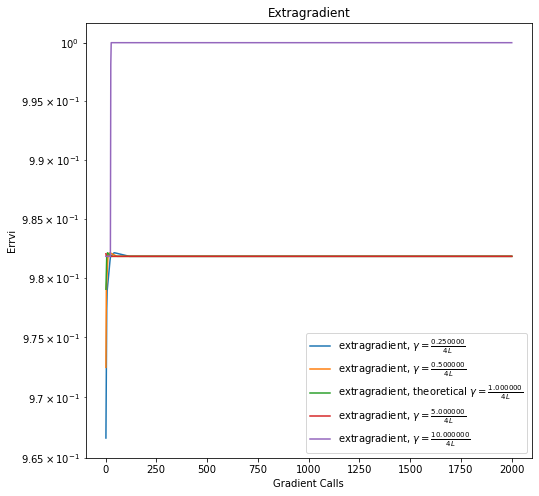

In [293]:
title = 'Extragradient'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "Errvi")

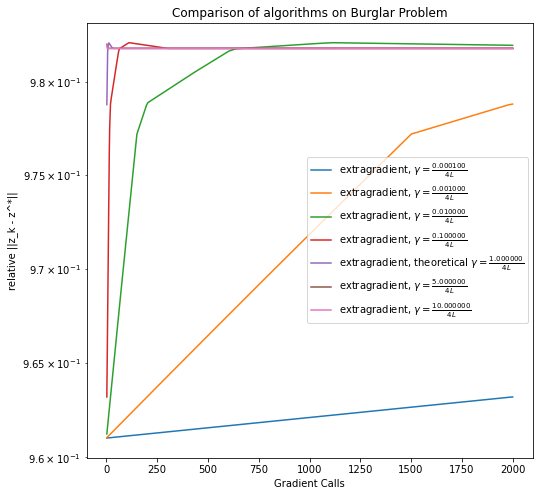

In [228]:
title = 'Comparison of algorithms on Burglar Problem'
opt.plot_graphs(x, y, x_label = "Gradient Calls", lines_labels = labels, title = title, 
                logscale = True, criteria_type = "Errvi", specific_slice = [0, 1, 2, 3, 4, 5, 6])

### Visualization

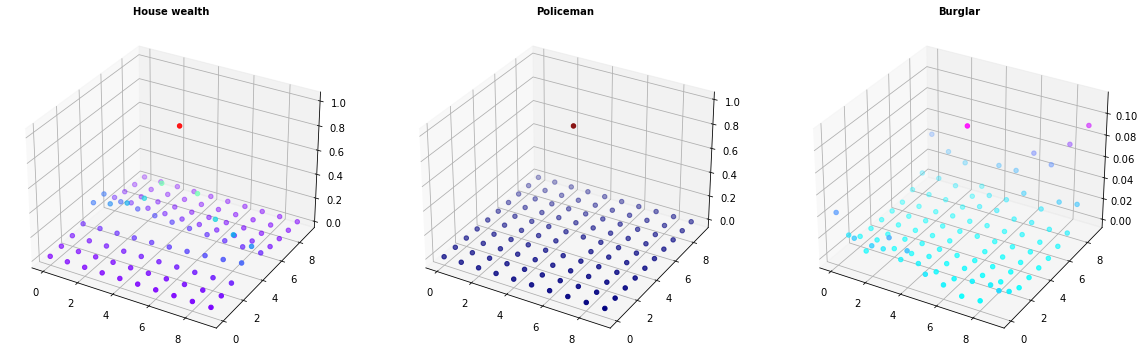

In [136]:
import matplotlib.pyplot as plt
from matplotlib import cm

x_sol, y_sol = smp_best_solution

X, Y = np.meshgrid(range(args['n']), range(args['n']))
X, Y = X.ravel(), Y.ravel()

fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize = (20, 30))

#plot
ax[0].scatter(X, Y, w_arr, c=w_arr, cmap=cm.rainbow)
ax[0].set_title(f"House wealth", fontsize = 10, fontweight='bold')
ax[1].scatter(X, Y, x_sol, c=x_sol, cmap=cm.jet)
ax[1].set_title(f"Policeman", fontsize = 10, fontweight='bold')
ax[2].scatter(X, Y, y_sol, c=y_sol, cmap=cm.cool)
ax[2].set_title(f"Burglar", fontsize = 10, fontweight='bold')

plt.show()

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [17]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [18]:
#ответ